Phase shift extraction code from interference data

Imports and adding path

In [163]:
# add path:
import sys
# sys.append(r"C:\Users\User\z\Desktop\WUT\Diplomka\ZPRACOVÁNÍ\Data testing\processing_project")
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..')) # Go up two levels from current path (from src/ to project root)
sys.path.append(project_root)
# add my library:
import global_utils
import constants
print(constants.__file__)
import global_functions_im
import utils
import functions_image_crop
import functions_phase_shift

# run this command to install all requirements:
#       pip install -r project_abel/requirements.txt
#       for pyAble a lower version of python is needed
# miscellaneous imports:
import matplotlib.pyplot as plt
import tifffile as tiff # Loads .tiff as a NumPy array
import numpy as np # low level image manipulation (matrix)
import cmasher as cmr # extra colormaps
# from cmap import Colormap
# from scipy.ndimage import gaussian_filter1d
# from scipy.signal import correlate
# from skimage.feature import peak_local_max
# from skimage.restoration import unwrap_phase
from scipy.ndimage import gaussian_filter
# import abel

C:\Users\User\z\Desktop\WUT\Diplomka\ZPRACOVÁNÍ\Data testing\processing_project\constants.py


Choosing path

In [164]:
path = constants.base_dir
folders = global_utils.get_folder_names(path)
folders2 = global_utils.get_folder_names(os.path.join(path, folders[1]))
folders3 = global_utils.get_folder_names(os.path.join(path, folders[1], folders2[1]))
path4 = os.path.join(path, folders[1], folders2[1], folders3[0])
folders4 = global_utils.get_folder_names(path4)
print(folders)
print(folders2)
print(folders3)
print(folders4)
# files
print("--- Files ---")
# path_img_files = os.path.join(path4, folders4[1])
# files_img = global_utils.get_file_names(path_img_files)
# path_ref_files = os.path.join(path4, folders4[9])
# files_ref = global_utils.get_file_names(path_ref_files)
# image path creation
# img_path = os.path.join(path_img_files, files_img[85]) # 85 - H0_3_28_25\(2) 1000 - 2000 ns\M7_X10.tif
# ref_path = os.path.join(path_ref_files, files_ref[19]) # 19 - H0_3_28_25\reference x4\REF_X9.tif

# ------ 2090 nm ------
path_img_files = os.path.join(path4, folders4[1])
files_img = global_utils.get_file_names(path_img_files)
img_path = os.path.join(path_img_files, files_img[0]) # 
path_ref_files = os.path.join(path, folders[1], folders2[1], folders3[9])
files_ref = global_utils.get_file_names(path_ref_files)
ref_path = os.path.join(path_ref_files, files_ref[1]) # 


# --- x2 ---
# files_img = global_utils.get_file_names(path + "\\" + folders[1] + "\\" + folders2[0] + "\\" + folders3[0] + "\\" + folders4[2])
# img_path = path + "\\" + folders[1] + "\\" + folders2[0] + "\\" + folders3[0] + "\\" + folders4[2] + "\\" + files_img[0]
# files_ref = global_utils.get_file_names(path + "\\" + folders[1] + "\\" + folders2[0] + "\\" + folders3[0] + "\\" + folders4[8])
# ref_path = path + "\\" + folders[1] + "\\" + folders2[0] + "\\" + folders3[0] + "\\" + folders4[8] + "\\" + files_ref[1]
# 1x ------
# files_img = global_utils.get_file_names(path + "\\" + folders[1] + "\\" + folders2[0] + "\\" + folders3[0] + "\\" + folders4[6])
# img_path = path + "\\" + folders[1] + "\\" + folders2[0] + "\\" + folders3[0] + "\\" + folders4[6] + "\\" + files_img[0]
# files_ref = global_utils.get_file_names(path + "\\" + folders[1] + "\\" + folders2[0] + "\\" + folders3[0] + "\\" + folders4[7])
# ref_path = path + "\\" + folders[1] + "\\" + folders2[0] + "\\" + folders3[0] + "\\" + folders4[7] + "\\" + files_ref[1]
print(img_path)
print(ref_path)

['IDEA program+ cvicna data', 'Images', 'Spectra']
['1064 nm', '2090 nm']
['Cu', 'H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'ref x4 Cu, 1-2us', 'ref x4 Cu,H0-H2,H6 - 50-1000ns', 'ref x4 H0, 1-2us', 'ref x4 H1, 1-2us', 'ref x4 H2, 1-2us', 'ref x4 H3,H4 1-2us', 'ref x4 H3-H5, 50-1000ns + H5 1-2us', 'ref x4 H6, 1-2us', 'wrong']
['(1) 50-1000ns', '(2) 1000-2000ns', '(3) 2-5us', '(4) 5-15us', '(5) 15-100us', '(6) 100us-2ms', 'reference x1', 'reference x2', 'reference x4']
--- Files ---
C:\Users\User\z\Desktop\WUT\Diplomka\DATA\Images\2090 nm\Cu\(2) 1000-2000ns\M10_X1.tif
C:\Users\User\z\Desktop\WUT\Diplomka\DATA\Images\2090 nm\ref x4 Cu,H0-H2,H6 - 50-1000ns\REFx4_X10.tif


Loading practice data

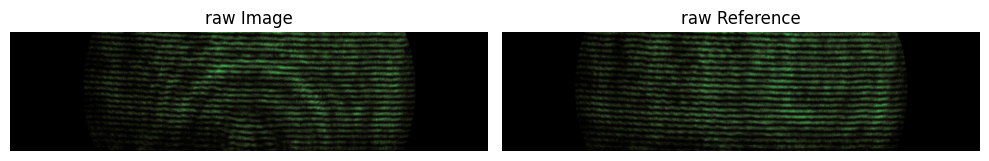

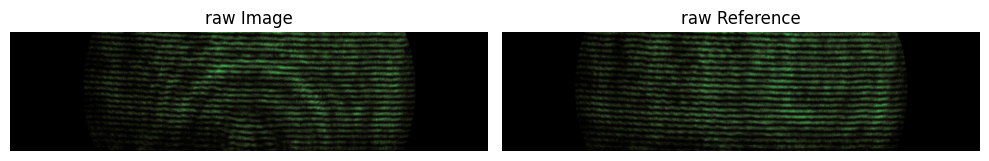

In [165]:
img = tiff.imread(img_path)
ref = tiff.imread(ref_path)

colormap = cmr.nuclear
global_functions_im.plot_two_images(img, ref, title1='raw Image', title2='raw Reference',cmap=colormap)
# global_functions_im.plot_two_images(img, ref, title1='raw Image', title2='raw Reference',cmap=colormap)

Auto crop function with a constant size for:
x4: 721 px - 40 px
x2: 433 px - 20 px
x1: 235 px - 20 px

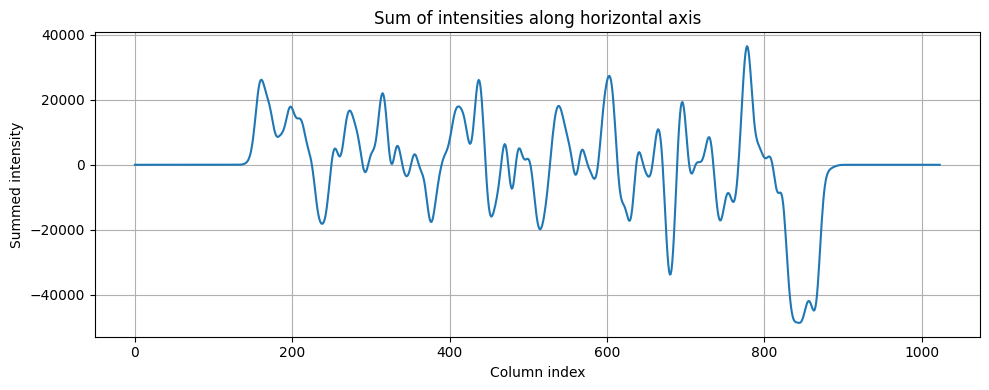

489
512
151 874
683


In [166]:
profile1 = functions_image_crop.get_horizontal_intensity_sum(img)
# utils.plot_intensity(profile1)
smoothed1 = functions_image_crop.smooth_profile(profile1, sigma = 5)
# utils.plot_intensity(smoothed1)
grad1 = functions_image_crop.calculate_1d_gradient(profile1, sigma = 5)
utils.plot_intensity(grad1)
center1 = functions_image_crop.center_by_symmetry_1d(profile1, smoothing_sigma=10)
print(center1)
# detect edges
l, r = functions_image_crop.detect_edges(profile1, smoothing_sigma=6, threshold_ratio=0.3)
# now you can compute the center or feed l and r into a crop function
print((l + r) // 2) 
print(l,r)
# crop
sx = (l + r) // 2
wid = r - l - 40 # r - l - #px
print(wid)
hei = img.shape[0]
crop_img = functions_image_crop.crop_from_center(img, sx, wid, hei)
crop_ref = functions_image_crop.crop_from_center(ref, sx, wid, hei)
colormap = cmr.nuclear
#
# global_functions_im.plot_two_images(crop_img, crop_ref, title1='crop Image', title2='crop Reference',cmap=colormap)

Padding image

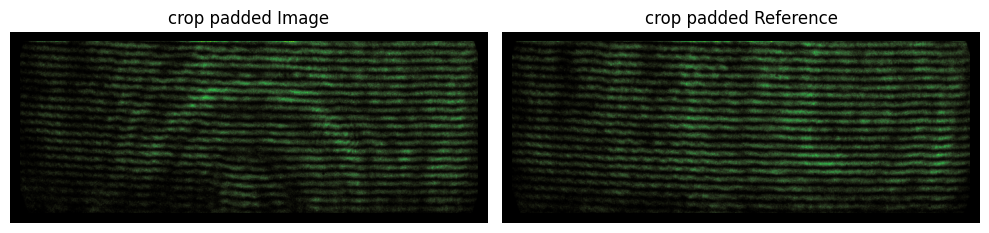

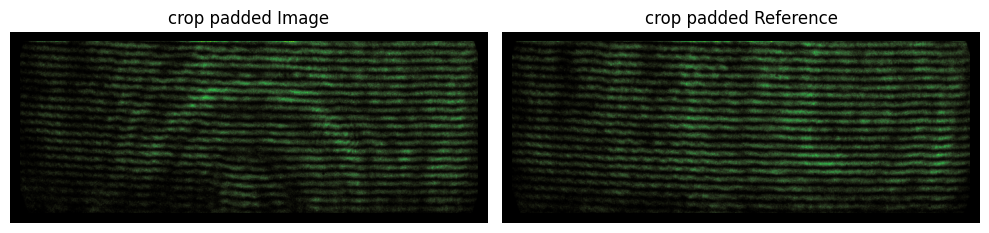

In [167]:
p = 15
padded_img = np.pad(crop_img, pad_width = p, mode = 'constant') # constant, wrap, symmetric
padded_ref = np.pad(crop_ref, pad_width = p, mode = 'constant') # constant, wrap, symmetric
global_functions_im.plot_two_images(padded_img, padded_ref, title1='crop padded Image', title2='crop padded Reference',cmap=colormap)

Fourier transform visualisation

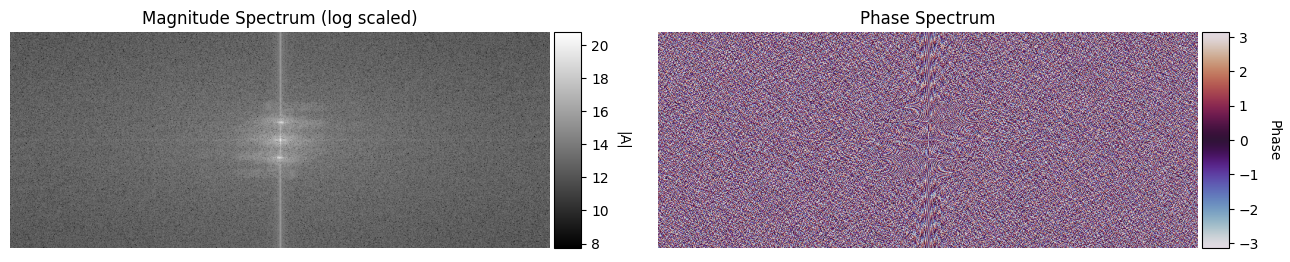

In [168]:
utils.plot_fft_spectra(padded_img, cmap_mag = 'gray')
# utils.plot_fft_spectra(padded_ref)

Fourier transform - automatic phase extraction pt1
1. Function for FFT
2. Function to find diffraction peaks
3. Function for elliptical mask
4. Extract phase

{'center': (142, 356), 'plus1': (np.int64(119), np.int64(357)), 'minus1': (np.int64(165), np.int64(355))}
22


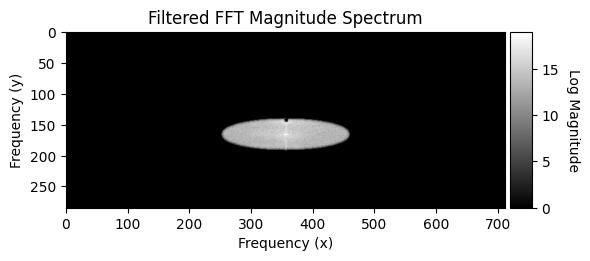

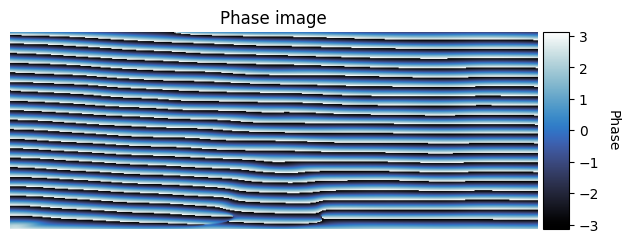

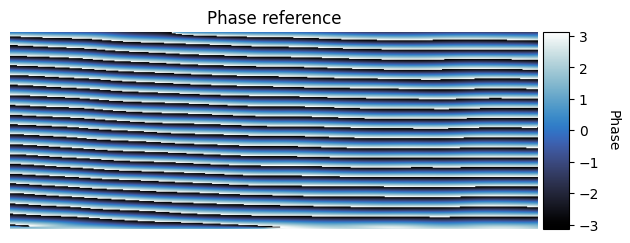

In [181]:
def compute_phase_from_padded(
    img_padded: np.ndarray,
    order: str = 'plus1',
    exclude_radius: int = 10,
    smooth_sigma: float = 0.0,
    a_div: int = 9,
    b_div: int = 9,
    mask_sigma: float = 0.0,
    pad: int = 0
) -> np.ndarray:
    """
    Locate a given Fourier peak in a zero-padded image (using simple top-two method),
    build an elliptical mask around it, and extract the phase image.

    Parameters
    ----------
    img_padded : 2D ndarray
        Zero-padded input image.
    order : {'center','plus1','minus1'}
        Which peak to isolate.
    exclude_radius : int
        Radius around DC to mask out before picking peaks.
    smooth_sigma : float
        Gaussian sigma for pre-peak FFT-magnitude smoothing.
    a_div, b_div : int
        Divisors for ellipse semi-axes: a = cols//a_div, b = rows//b_div.
    mask_sigma : float
        If >0, Gaussian-smooth the binary mask by this sigma.
    pad : int
        Number of pixels of padding on each side to remove from the output.

    Returns
    -------
    phase_image : 2D ndarray
        Phase of the inverse FFT of the masked Fourier component,
        cropped to original size if pad>0.
    """
    coords = functions_phase_shift.find_fourier_peaks(
        img=img_padded,
        exclude_radius=exclude_radius,
        smooth_sigma=smooth_sigma
    )
    y0, x0 = coords[order]
    rows, cols = img_padded.shape
    a = cols // a_div
    b = rows // b_div
    mask = functions_phase_shift.create_ellipse_mask(
        shape=(rows, cols),
        x_center=x0,
        y_center=y0,
        a=a,
        b=b,
        sigma=mask_sigma
    )
    return functions_phase_shift.extract_phase_from_mask_v2(
        img_padded=img_padded,
        mask=mask,
        peak_coord=(y0, x0),
        pad=pad,
        inner_radius_mask = 3
    )


# isolate the +1st-order peak and get its phase map
spectr_peaks = functions_phase_shift.find_fourier_peaks(padded_img,exclude_radius = 8,smooth_sigma=1.0)
print(spectr_peaks)
# extract the first coordinate of ‘center’ and ‘plus1’
peak_name = 'minus1'  # or 'plus1', or 'minus1'

if peak_name == 'plus1':
    y_peak = int(spectr_peaks['plus1'][0])
    x_peak = int(spectr_peaks['plus1'][1])
elif peak_name == 'minus1':
    y_peak = int(spectr_peaks['minus1'][0])
    x_peak = int(spectr_peaks['minus1'][1])
else:
    raise ValueError(f"Unknown peak_name: {peak_name!r}")

y_peak_c = int(spectr_peaks['center'][0])
x_peak_c = int(spectr_peaks['center'][1])

spectr_peak_distance = abs(y_peak_c - y_peak) - 1
print(spectr_peak_distance)
# y_peak= y_peak - 15
# plot masked spectra
a = 100
b = spectr_peak_distance
rows, cols = padded_img.shape
maskino_spectrino = functions_phase_shift.create_ellipse_mask(
        shape=(rows, cols),
        x_center=x_peak,
        y_center=y_peak,
        a= a,
        b= b,
        sigma=1
    )
maskino_spectrino_center = functions_phase_shift.circular_exclusion_mask(
    shape=(rows, cols),
    center=(y_peak_c,x_peak_c),
    radius=3
)

# inferno_cmap = plt.get_cmap('gray')  # this is the Colormap instance
# global_functions_im.plot_image(maskino_spectrino_center, cmap=cmr.cosmic)
fig = utils.plot_filtered_fft_spectrum(img_padded=padded_img, mask=maskino_spectrino, extra_mask=maskino_spectrino_center)
# -----
phase_map_im = compute_phase_from_padded(
    img_padded=padded_img,
    order=peak_name,
    exclude_radius=8,
    smooth_sigma=2,
    a_div=a,
    b_div=b,
    mask_sigma=1,
    pad = p
)
phase_map_ref = compute_phase_from_padded(
    img_padded=padded_ref,
    order=peak_name,
    exclude_radius=8,
    smooth_sigma=2,
    a_div=a,
    b_div=b,
    mask_sigma=1,
    pad = p
)
# Colormap('cmap:red')
fig = global_functions_im.plot_image(phase_map_im, title='Phase image', cmap=cmr.arctic, colorbar_label='Phase') # arctic
fig = global_functions_im.plot_image(phase_map_ref, title='Phase reference', cmap=cmr.arctic, colorbar_label='Phase') # arctic
# %matplotlib notebook
# global_utils.save_plot_as_png(r'C:\Users\User\z\Desktop\WUT\Diplomka\ZPRACOVÁNÍ\Data testing\processing_project\Abel-inversion\output\phase_a100_b30_sgm_1(2).png', fig)

Phase shift + crop bottom

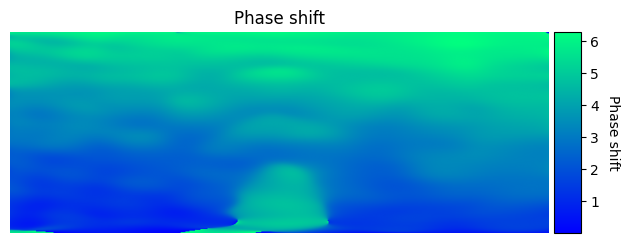

In [170]:
phase_shift = phase_map_ref - phase_map_im
phase_shift = np.mod(phase_shift, 2 * np.pi) # modulo 2pi

fig = global_functions_im.plot_image(phase_shift, title='Phase shift', cmap='winter',colorbar_label='Phase shift') # arctic
# global_utils.save_plot_as_png(r'C:\Users\User\z\Desktop\WUT\Diplomka\ZPRACOVÁNÍ\Data testing\processing_project\Abel-inversion\output\phaseshift_a100_b15_sgm_1.png', fig)

Phase unwrap

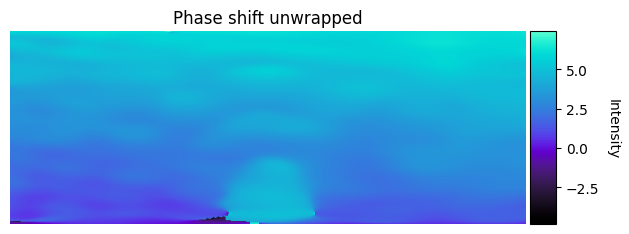

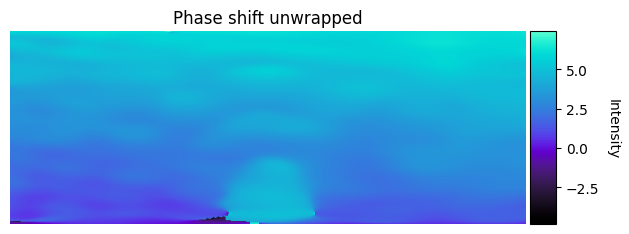

In [171]:
## --- Phase UNWRAP with step function algorithms ---
# openCV library

# image_unwrapped = unwrap_phase(phase_shift, wrap_around=(False, False))
# image_unwrapped = np.unwrap(np.unwrap(phase_shift, axis=0), axis=1)
from skimage.restoration import unwrap_phase
image_unwrapped = unwrap_phase(phase_shift)
global_functions_im.plot_image(image_unwrapped, title='Phase shift unwrapped', cmap=cmr.cosmic) # prinsenvlag, iceburn, redshift
# global_functions_im.save_tiff(image_unwrapped, r"C:\Users\User\z\Desktop\WUT\Diplomka\ZPRACOVÁNÍ\Data testing\processing_project\Abel-inversion\output\random_test.jpg")


# wrapped_phase is your 2D numpy array in (−π,π]
#mage_unwrapped = pywrap.unwrap_branch_cut(phase_shift)
# or for the Poisson solver
#unwrapped_ls = pywrap.unwrap_least_squares(phase_shift)

#plot_image(image_unwrapped, title='Phase shift', cmap=cmr.redshift) # prinsenvlag, iceburn, redshift


Now we select a single row and make an Abel transform. However before that the data needs to get pre-processed. This can go few different ways.
1. Everything where (r > R) = 0 -> masking out the plasma
2. Using PyAbel library - I need to symmetrize the data by:
a) remove linear tilt: subtract a best‐fit straight line from that 1D signal to correct any sloping background.
b) Average Left and Right: enforce perfect symmetry about the chosen centre by replacing each pair of equidistant points with their average.
-- OR --
a) Use 1D fourier transform: you can enforce even symmetry by projecting out the odd component in the transform domain. For any 1D real signal h(x), its Fourier transform H(k)=F{h}(k) can be split into H(k)=H(k)_even + iH(k)_odd where H(k)_even =ℜ{H(k)}. The inverse transform of just the real part gives you the even (symmetric) component.
-- OR --
a) Fourier-Hankel transform
b) zero padding needed
3. Abel transform
I need to check which algorithm is the best for the job.

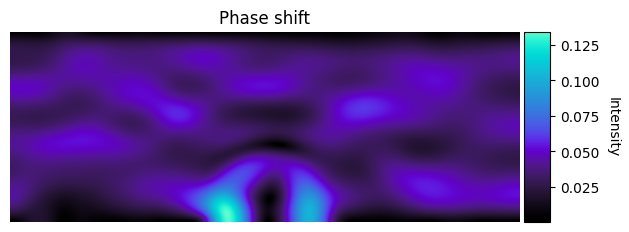

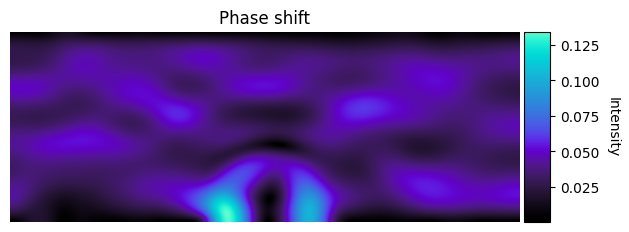

In [172]:
from skimage.filters import sobel_h, sobel_v
def compute_gradient_map(data: np.ndarray,
                         smooth_sigma: float = 1.0) -> np.ndarray:
    """
    Compute the gradient magnitude map of a two dimensional array
    using Sobel filters and optional Gaussian smoothing

    Parameters
    ----------
    data : np.ndarray
        Two dimensional array of scalar values
    smooth_sigma : float
        Standard deviation for Gaussian smoothing.
        If zero or None no smoothing is applied

    Returns
    -------
    grad : np.ndarray
        Gradient magnitude map of same shape as data
    """
    if data.ndim != 2:
        raise ValueError(f"Expected 2D array but got ndim={data.ndim}")

    # apply Gaussian smoothing if requested
    if smooth_sigma:
        img = gaussian_filter(data, sigma=smooth_sigma)
    else:
        img = data

    # compute Sobel derivatives
    gx = sobel_h(img)
    gy = sobel_v(img)

    # combine into gradient magnitude
    grad = np.hypot(gx, gy)
    return grad

gradient = compute_gradient_map(image_unwrapped, smooth_sigma = 20)
global_functions_im.plot_image(gradient, title='Phase shift', cmap=cmr.cosmic) # prinsenvlag, iceburn, redshift

1. Masking out plasma

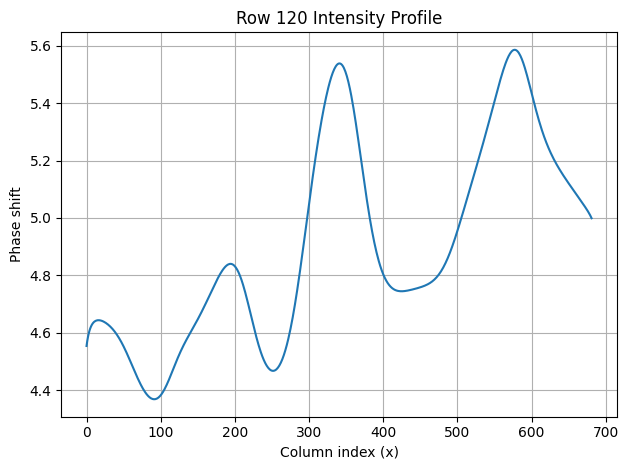

In [173]:
def plot_image_row(img: np.ndarray, row: int, title: str = None) -> None:
    """
    Plot the intensity profile of a single row of a 2D image.

    Parameters
    ----------
    img : 2D ndarray
        Input image (rows = height, cols = width).
    row : int
        Zero-based index of the row to plot (vertical coordinate).
    title : str, optional
        Plot title.
    """
    profile = img[row, :]            # grab the row (y = row, all x)
    plt.figure()
    plt.plot(profile)
    if title:
        plt.title(title)
    plt.xlabel("Column index (x)")
    plt.ylabel("Phase shift")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_image_row(image_unwrapped, row=50, title="Row 120 Intensity Profile")

In [174]:
"""
from abel import tools, transform

# 3 Perform inverse Abel transform with two methods
inv_basex     = transform.basex.basex_transform(image_unwrapped)
inv_hansenlaw = transform.hansenlaw.hansenlaw_transform(image_unwrapped)

# 4 Visualize original and inverted images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image_unwrapped, origin='lower', cmap='gray')
axes[0].set_title('Original projection')
axes[0].axis('off')

axes[1].imshow(inv_basex, origin='lower', cmap=cmr.iceburn)
axes[1].set_title('Inverse Abel (BASEX)')
axes[1].axis('off')

axes[2].imshow(inv_hansenlaw, origin='lower', cmap=cmr.iceburn)
axes[2].set_title('Inverse Abel (Hansen–Law)')
axes[2].axis('off')

plt.tight_layout()
plt.show()
"""

"\nfrom abel import tools, transform\n\n# 3\u2003Perform inverse Abel transform with two methods\ninv_basex     = transform.basex.basex_transform(image_unwrapped)\ninv_hansenlaw = transform.hansenlaw.hansenlaw_transform(image_unwrapped)\n\n# 4\u2003Visualize original and inverted images\nfig, axes = plt.subplots(1, 3, figsize=(12, 4))\n\naxes[0].imshow(image_unwrapped, origin='lower', cmap='gray')\naxes[0].set_title('Original projection')\naxes[0].axis('off')\n\naxes[1].imshow(inv_basex, origin='lower', cmap=cmr.iceburn)\naxes[1].set_title('Inverse Abel (BASEX)')\naxes[1].axis('off')\n\naxes[2].imshow(inv_hansenlaw, origin='lower', cmap=cmr.iceburn)\naxes[2].set_title('Inverse Abel (Hansen–Law)')\naxes[2].axis('off')\n\nplt.tight_layout()\nplt.show()\n"